C:\Users\mushf\AppData\Local\Temp\ipykernel_10012\3272115798.py:34: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("D:/DM_LAB/merged_data.csv")  # Replace "your_data.csv" with your file path


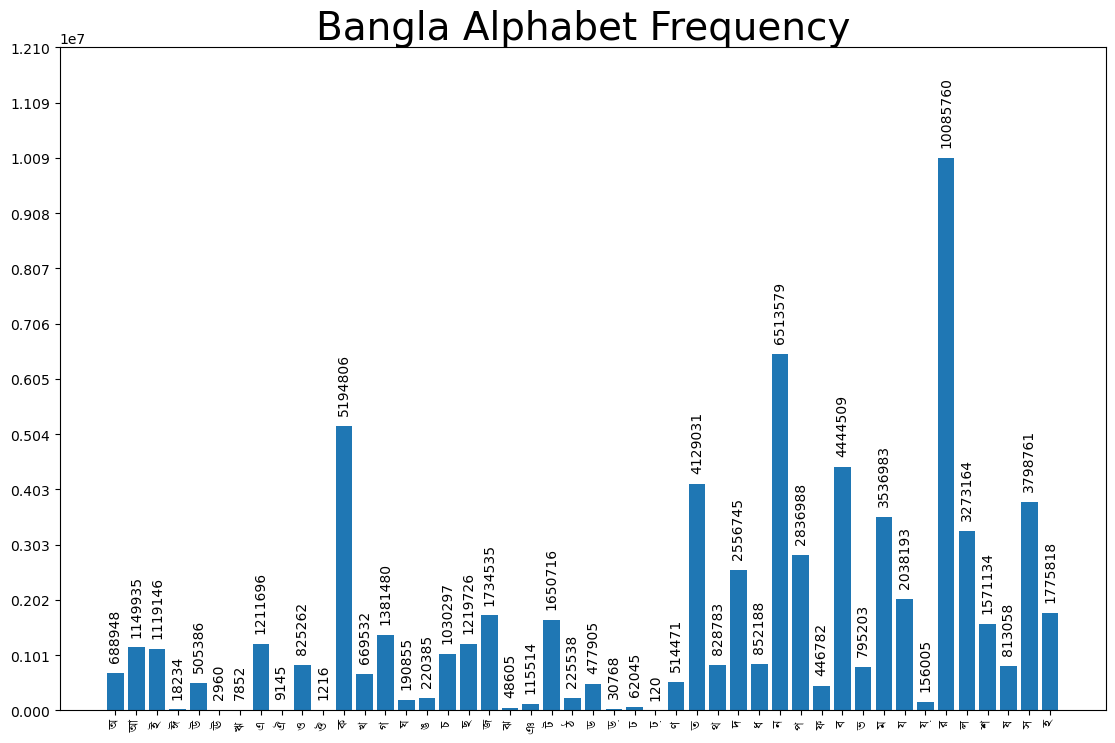

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

def plot_from_dictionary(dic, title=None, size=(13.5, 8.5), bottom=0.1, x_font='kalpurush', save_to_device=True):
    fig = plt.figure(figsize=size)
    fig.subplots_adjust(bottom=bottom)

    barChart = plt.bar(list(dic.keys()), dic.values())
    plt.title(title, fontsize=28)
    plt.style.use('ggplot')

    plt.xticks(list(dic.keys()), dic.keys(), fontname=x_font, rotation='vertical')
    plt.yticks(np.arange(0, max(dic.values()) + max(dic.values()) // 4, max(dic.values()) // 10))

    for i in range(len(list(dic.keys()))):
        plt.text(i, list(dic.values())[i] + max(0.5, max(dic.values()) // 40), list(dic.values())[i], ha='center',
                 rotation='vertical')
    plt.show()

    if save_to_device:
        fig.savefig(title + '.png')

def process_text_chunk(text_chunk, LetterList):
    all_text = ' '.join(text_chunk)
    bangla_alphabet = ''.join([char for char in all_text if 'অ' <= char <= '৿'])
    letter_freq = {letter: bangla_alphabet.count(letter) for letter in LetterList}
    return letter_freq

batch_size = 1000  # Adjust this value based on available memory

# Load CSV data into a DataFrame
data = pd.read_csv("D:/DM_LAB/merged_data.csv")  # Replace "your_data.csv" with your file path

# Extract the column containing the text data
text_column = data['news_description']  # Replace "text_column_name" with the actual column name


# Convert the text column to strings
text_column = text_column.astype(str)

# Define the list of specific Bangla alphabet letters
LetterList = ['অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ', 'ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ',
              'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ',
              'ষ', 'স', 'হ', 'ড়', 'ঢ়', 'য়']

# Process the text data in batches
num_rows = len(text_column)
letter_freq = {letter: 0 for letter in LetterList}  # Initialize letter frequency dictionary

for start in range(0, num_rows, batch_size):
    end = min(start + batch_size, num_rows)
    text_chunk = text_column[start:end]
    letter_freq_chunk = process_text_chunk(text_chunk, LetterList)
    
    # Aggregate letter frequencies from each chunk
    for letter in LetterList:
        letter_freq[letter] += letter_freq_chunk.get(letter, 0)

# Save frequency data to a DataFrame and CSV
df = pd.DataFrame({'letter': letter_freq.keys(), 'frequency': letter_freq.values()})
df.to_csv('letter_frequencies.csv', index=False)

# Plot the histogram
plot_from_dictionary(dict(sorted(letter_freq.items(), key=lambda item: item[0])),
                     title='Bangla Alphabet Frequency',
                     save_to_device=True)
